In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
text="""
1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581
""".strip()
lines=text.strip().split('\n')
arr_str=[[int(_) for _ in line] for line in lines]
arr=array(arr_str)
arr

array([[1, 1, 6, 3, 7, 5, 1, 7, 4, 2],
       [1, 3, 8, 1, 3, 7, 3, 6, 7, 2],
       [2, 1, 3, 6, 5, 1, 1, 3, 2, 8],
       [3, 6, 9, 4, 9, 3, 1, 5, 6, 9],
       [7, 4, 6, 3, 4, 1, 7, 1, 1, 1],
       [1, 3, 1, 9, 1, 2, 8, 1, 3, 7],
       [1, 3, 5, 9, 9, 1, 2, 4, 2, 1],
       [3, 1, 2, 5, 4, 2, 1, 6, 3, 9],
       [1, 2, 9, 3, 1, 3, 8, 5, 2, 1],
       [2, 3, 1, 1, 9, 4, 4, 5, 8, 1]])

answer is:

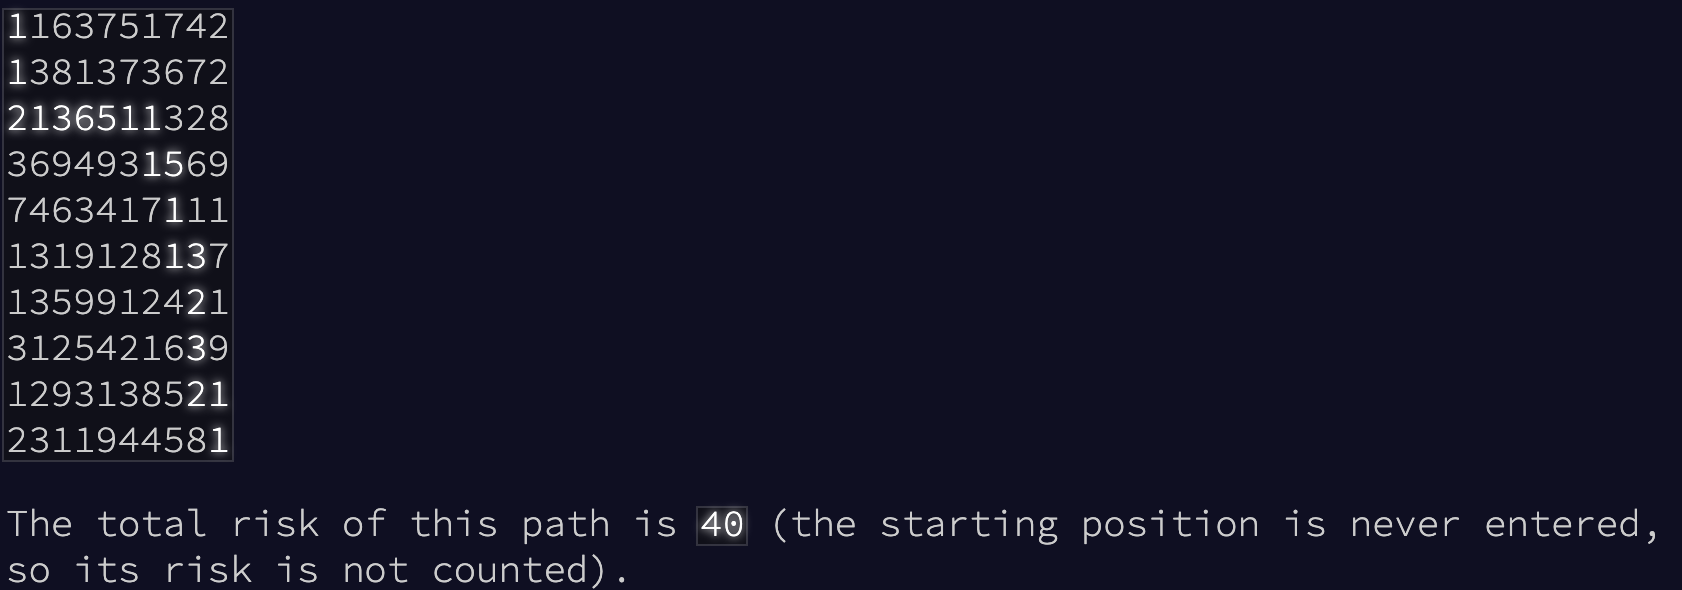

https://www.cantorsparadise.com/dijkstras-shortest-path-algorithm-in-python-d955744c7064

INITIALIZATION

1.  Set the `provisional_distance` of all nodes from the source node to infinity.
2.  Define an empty set of `seen_nodes`. This set will ensure we don’t re-evaluate a node which already has the shortest path set, and that we don’t evaluate paths through a node which has a shorter path to the source than the current path. Remember that nodes **only** go into `seen_nodes` once we are **sure** that we have their absolute shortest distance (not just their provisional distance). We use a set so that we get that sweet O(1) lookup time rather than repeatedly searching through an array at O(n) time.
3.  Set the `provisional_distance` of the source node to equal 0, and the array representing the hops taken to just include the source node itself. (This will be useful later as we track which path through the graph we take to get the calculated minimum distance).

ITERATIVE PROCEDURE

4. **While** we have not `seen` all nodes (or, in the case of source to single destination node evaluation, while we have not `seen` the destination node):

5. Set `current_node` to the node with the smallest `provisional_distance` in the entire graph. Note that for the first iteration, this will be the `source_node` because we set its `provisional_distance` to 0.

6. Add `current_node` to the `seen_nodes` set.

7. Update the `provisional_distance` of each of `current_node`'s neighbors to be the (absolute) distance from `current_node` to `source_node` plus the edge length from `current_node` to that neighbor IF that value is less than the neighbor’s current `provisional_distance`. If this neighbor has never had a provisional distance set, remember that it is initialized to infinity and thus must be larger than this sum. If we update `provisional_distance`, also update the “hops” we took to get this distance by concatenating `current_node`'s hops to the source node with `current_node` itself.

8. **End While**.

In [3]:
inf=np.inf

In [4]:
distances=ones_like(arr)*inf
distances

array([[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]])

In [5]:
distances[0]=0

In [6]:
visited=zeros_like(arr)

In [7]:
current=0,0
R,C=arr.shape
destination=R-1,C-1

In [8]:
def neighbors(node):
    r,c=node
    R,C=arr.shape
    N=[]
    if r>0:
        N.append( (r-1,c) )
    if c>0:
        N.append( (r,c-1) )
    if c<(C-1):
        N.append( (r,c+1) )
    if r<(R-1):
        N.append( (r+1,c) )
        
        
    return N

In [9]:
def unvisited_neighbors(node):
    return [(r,c) for (r,c) in neighbors(node) if not visited[r,c]]

In [10]:
inf=1000
distances=ones_like(arr)*inf
visited=zeros_like(arr)
distances[0,0]=0
current=0,0
R,C=arr.shape
RR,CC=mgrid[0:R,0:C]
destination=R-1,C-1
distances

array([[   0, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]])

In [11]:
while True:

    # Set current_node to the node with the smallest provisional_distance in the entire graph. 
    # Note that for the first iteration, this will be the source_node because we set its provisional_distance to 0.

    # Add current_node to the seen_nodes set.

    # Update the provisional_distance of each of current_node's neighbors to be the (absolute) distance from 
    # current_node to source_node plus the edge length from current_node to that neighbor IF that value is less than 
    # the neighbor’s current provisional_distance. If this neighbor has never had a provisional distance set, 
    # remember that it is initialized to infinity and thus must be larger than this sum. 
    # If we update provisional_distance, also update the “hops” we took to get this distance by concatenating current_node's hops to 
    # the source node with current_node itself.    
    
    idx=distances[visited==0].argmin()
    current=RR[visited==0][idx],CC[visited==0][idx]
    visited[current]=1
    
    U=unvisited_neighbors(current)
    tentative_dist=[]
    for r,c in U:
        dist=distances[current]+arr[r,c]
        if dist<distances[r,c]:
            distances[r,c]=dist   

    if visited[destination]:
        break

    if all(visited[:]):
        break

    
print(distances[destination])

40


In [12]:
with open('data/day15.txt') as fid:
    text=fid.read()
lines=text.strip().split('\n')
arr_str=[[int(_) for _ in line] for line in lines]
arr=array(arr_str)
arr    

array([[3, 5, 7, ..., 1, 2, 8],
       [1, 7, 1, ..., 6, 8, 8],
       [2, 1, 5, ..., 5, 2, 2],
       ...,
       [6, 5, 1, ..., 5, 3, 4],
       [3, 9, 9, ..., 7, 2, 1],
       [5, 9, 9, ..., 4, 6, 2]])

In [13]:
inf=1000000
distances=ones_like(arr)*inf
visited=zeros_like(arr)
distances[0,0]=0
current=0,0
R,C=arr.shape
RR,CC=mgrid[0:R,0:C]
destination=R-1,C-1
distances

array([[      0, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       ...,
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000]])

In [14]:
while True:

    # Set current_node to the node with the smallest provisional_distance in the entire graph. 
    # Note that for the first iteration, this will be the source_node because we set its provisional_distance to 0.

    # Add current_node to the seen_nodes set.

    # Update the provisional_distance of each of current_node's neighbors to be the (absolute) distance from 
    # current_node to source_node plus the edge length from current_node to that neighbor IF that value is less than 
    # the neighbor’s current provisional_distance. If this neighbor has never had a provisional distance set, 
    # remember that it is initialized to infinity and thus must be larger than this sum. 
    # If we update provisional_distance, also update the “hops” we took to get this distance by concatenating current_node's hops to 
    # the source node with current_node itself.    
    
    idx=distances[visited==0].argmin()
    current=RR[visited==0][idx],CC[visited==0][idx]
    visited[current]=1
    
    U=unvisited_neighbors(current)
    tentative_dist=[]
    for r,c in U:
        dist=distances[current]+arr[r,c]
        if dist<distances[r,c]:
            distances[r,c]=dist   

    if visited[destination]:
        break

    if all(visited[:]):
        break

    
print(distances[destination])

487


## Part 2

In [28]:
text="""
1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581
""".strip()
lines=text.strip().split('\n')
arr_str=[[int(_) for _ in line] for line in lines]
arr=array(arr_str)
arr

array([[1, 1, 6, 3, 7, 5, 1, 7, 4, 2],
       [1, 3, 8, 1, 3, 7, 3, 6, 7, 2],
       [2, 1, 3, 6, 5, 1, 1, 3, 2, 8],
       [3, 6, 9, 4, 9, 3, 1, 5, 6, 9],
       [7, 4, 6, 3, 4, 1, 7, 1, 1, 1],
       [1, 3, 1, 9, 1, 2, 8, 1, 3, 7],
       [1, 3, 5, 9, 9, 1, 2, 4, 2, 1],
       [3, 1, 2, 5, 4, 2, 1, 6, 3, 9],
       [1, 2, 9, 3, 1, 3, 8, 5, 2, 1],
       [2, 3, 1, 1, 9, 4, 4, 5, 8, 1]])

In [29]:
arrays=[arr]
arr2=arr
for i in range(4):
    arr2=arr2+1
    arr2[arr2>9]=1
    arrays.append(arr2)
    
arrays=hstack(arrays)

In [30]:
row=arrays[0]
[''.join([str(v) for v in row]) for row in arrays]

['11637517422274862853338597396444961841755517295286',
 '13813736722492484783351359589446246169155735727126',
 '21365113283247622439435873354154698446526571955763',
 '36949315694715142671582625378269373648937148475914',
 '74634171118574528222968563933317967414442817852555',
 '13191281372421239248353234135946434524615754563572',
 '13599124212461123532357223464346833457545794456865',
 '31254216394236532741534764385264587549637569865174',
 '12931385212314249632342535174345364628545647573965',
 '23119445813422155692453326671356443778246755488935']

In [31]:
arr=arrays
arr2=arr
arrays=[arr]
for i in range(4):
    arr2=arr2+1
    arr2[arr2>9]=1
    arrays.append(arr2)
    
arrays=vstack(arrays)

In [34]:
row=arrays[0]
S='\n'.join([''.join([str(v) for v in row]) for row in arrays])
print(S)

11637517422274862853338597396444961841755517295286
13813736722492484783351359589446246169155735727126
21365113283247622439435873354154698446526571955763
36949315694715142671582625378269373648937148475914
74634171118574528222968563933317967414442817852555
13191281372421239248353234135946434524615754563572
13599124212461123532357223464346833457545794456865
31254216394236532741534764385264587549637569865174
12931385212314249632342535174345364628545647573965
23119445813422155692453326671356443778246755488935
22748628533385973964449618417555172952866628316397
24924847833513595894462461691557357271266846838237
32476224394358733541546984465265719557637682166874
47151426715826253782693736489371484759148259586125
85745282229685639333179674144428178525553928963666
24212392483532341359464345246157545635726865674683
24611235323572234643468334575457944568656815567976
42365327415347643852645875496375698651748671976285
23142496323425351743453646285456475739656758684176
3422155692453326671356443778246

In [35]:
arr=arrays

In [36]:
inf=1000000
distances=ones_like(arr)*inf
visited=zeros_like(arr)
distances[0,0]=0
current=0,0
R,C=arr.shape
RR,CC=mgrid[0:R,0:C]
destination=R-1,C-1
distances

array([[      0, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       ...,
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000]])

In [37]:
while True:

    # Set current_node to the node with the smallest provisional_distance in the entire graph. 
    # Note that for the first iteration, this will be the source_node because we set its provisional_distance to 0.

    # Add current_node to the seen_nodes set.

    # Update the provisional_distance of each of current_node's neighbors to be the (absolute) distance from 
    # current_node to source_node plus the edge length from current_node to that neighbor IF that value is less than 
    # the neighbor’s current provisional_distance. If this neighbor has never had a provisional distance set, 
    # remember that it is initialized to infinity and thus must be larger than this sum. 
    # If we update provisional_distance, also update the “hops” we took to get this distance by concatenating current_node's hops to 
    # the source node with current_node itself.    
    
    idx=distances[visited==0].argmin()
    current=RR[visited==0][idx],CC[visited==0][idx]
    visited[current]=1
    
    U=unvisited_neighbors(current)
    tentative_dist=[]
    for r,c in U:
        dist=distances[current]+arr[r,c]
        if dist<distances[r,c]:
            distances[r,c]=dist   

    if visited[destination]:
        break

    if all(visited[:]):
        break

    
print(distances[destination])

315


In [38]:
with open('data/day15.txt') as fid:
    text=fid.read()
lines=text.strip().split('\n')
arr_str=[[int(_) for _ in line] for line in lines]
arr=array(arr_str)
arr    

array([[3, 5, 7, ..., 1, 2, 8],
       [1, 7, 1, ..., 6, 8, 8],
       [2, 1, 5, ..., 5, 2, 2],
       ...,
       [6, 5, 1, ..., 5, 3, 4],
       [3, 9, 9, ..., 7, 2, 1],
       [5, 9, 9, ..., 4, 6, 2]])

In [39]:
arrays=[arr]
arr2=arr
for i in range(4):
    arr2=arr2+1
    arr2[arr2>9]=1
    arrays.append(arr2)
    
arrays=hstack(arrays)

In [40]:
arr=arrays
arr2=arr
arrays=[arr]
for i in range(4):
    arr2=arr2+1
    arr2[arr2>9]=1
    arrays.append(arr2)
    
arrays=vstack(arrays)

In [41]:
arrays.shape

(500, 500)

In [44]:
arr=arrays

In [45]:
inf=1000000
distances=ones_like(arr)*inf
visited=zeros_like(arr)
distances[0,0]=0
current=0,0
R,C=arr.shape
RR,CC=mgrid[0:R,0:C]
destination=R-1,C-1
distances

array([[      0, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       ...,
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000],
       [1000000, 1000000, 1000000, ..., 1000000, 1000000, 1000000]])

In [46]:
while True:

    # Set current_node to the node with the smallest provisional_distance in the entire graph. 
    # Note that for the first iteration, this will be the source_node because we set its provisional_distance to 0.

    # Add current_node to the seen_nodes set.

    # Update the provisional_distance of each of current_node's neighbors to be the (absolute) distance from 
    # current_node to source_node plus the edge length from current_node to that neighbor IF that value is less than 
    # the neighbor’s current provisional_distance. If this neighbor has never had a provisional distance set, 
    # remember that it is initialized to infinity and thus must be larger than this sum. 
    # If we update provisional_distance, also update the “hops” we took to get this distance by concatenating current_node's hops to 
    # the source node with current_node itself.    
    
    idx=distances[visited==0].argmin()
    current=RR[visited==0][idx],CC[visited==0][idx]
    visited[current]=1
    
    U=unvisited_neighbors(current)
    tentative_dist=[]
    for r,c in U:
        dist=distances[current]+arr[r,c]
        if dist<distances[r,c]:
            distances[r,c]=dist   

    if visited[destination]:
        break

    if all(visited[:]):
        break

    
print(distances[destination])

2821
